In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
from scipy.signal import spectrogram

# Function to read the most recent CSV file for each symbol
def read_most_recent_csv(symbol, depth_levels, data_path="data"):
    # Get a list of all CSV files for the symbol in the specified folder
    files = [f for f in os.listdir(data_path) if f.startswith(f"{symbol}_{depth_levels}depth") and f.endswith(".csv")]
    
    if not files:
        print(f"No files found for {symbol}!")
        return None
    
    # Get the full file paths
    files = [os.path.join(data_path, f) for f in files]
    
    # Sort the files by modification time (latest file first)
    latest_file = max(files, key=os.path.getmtime)
    
    print(f"Reading {latest_file}...")
    
    # Read and return the most recent CSV file
    return pd.read_csv(latest_file)

# Function to compute the spectrogram
def compute_spectrogram(df, column='return', fs=50, nperseg=256):
    """
    Compute the spectrogram for irregularly sampled data.

    :param df: The DataFrame containing the data.
    :param column: The column to compute the spectrogram on (default is 'return').
    :param fs: The sampling frequency after interpolation (default is 1 Hz).
    :param nperseg: The number of samples per segment for the spectrogram calculation (default 256).
    :return: The spectrogram (f, t, Sxx) where f is the frequency, t is time, and Sxx is the power spectrum.
    """
    # Interpolate the data to a regular time grid
    df_resampled = df.copy()
    df_resampled['timestamp'] = pd.to_datetime(df['timestamp'])
    df_resampled.set_index('timestamp', inplace=True)
    
    # Resample the data to a regular time grid (e.g., 1-second intervals)
    df_resampled = df_resampled.resample(f'{1/fs}s').mean()  # Resample at fs Hz
    
    # Compute the spectrogram on the selected column ('return' by default)
    f, t, Sxx = spectrogram(df_resampled[column].dropna(), fs=fs, nperseg=nperseg)
    
    return f, t, Sxx

In [10]:
depth_levels = 20  # Adjust based on your dataset
duration = 120
symbols = ["btcusdt", "ethusdt"]#, "bnbusdt", "xrpusdt", "ltcusdt", "adausdt", "solusdt", "dogeusdt", "bchusdt", "dotusdt"]

df = read_most_recent_csv(symbol="btcusdt", depth_levels=depth_levels)

Reading data/btcusdt_20depth_20250310_092711.csv...


In [12]:
df['timestamp']

0       2025-03-10 09:17:11.863462
1       2025-03-10 09:17:12.102515
2       2025-03-10 09:17:12.126681
3       2025-03-10 09:17:12.339219
4       2025-03-10 09:17:12.365316
                   ...            
5977    2025-03-10 09:27:10.071510
5978    2025-03-10 09:27:10.151613
5979    2025-03-10 09:27:10.287911
5980    2025-03-10 09:27:10.332817
5981    2025-03-10 09:27:10.477453
Name: timestamp, Length: 5982, dtype: object

Reading data/btcusdt_20depth_20250310_092711.csv...


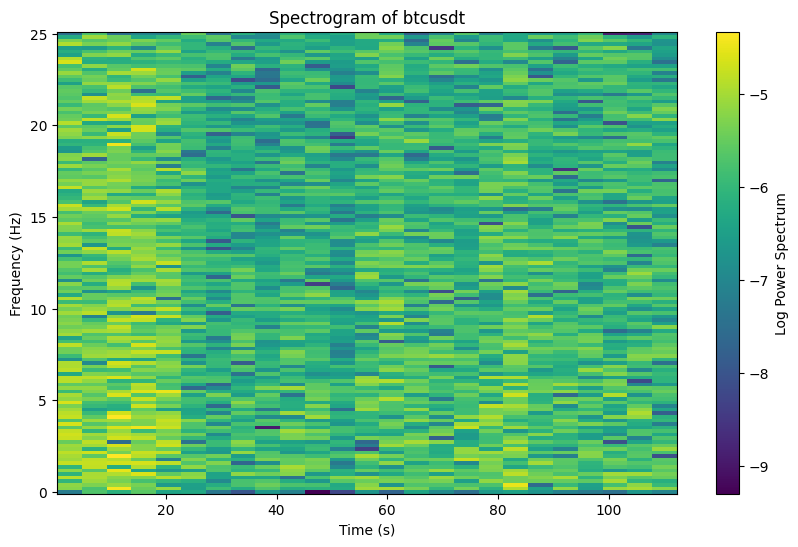

Reading data/ethusdt_20depth_20250310_092711.csv...


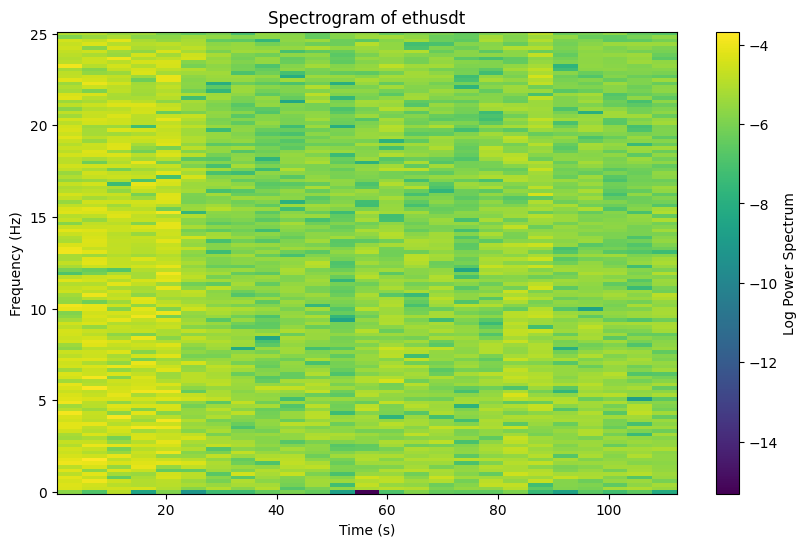

In [4]:
# Plot the spectrogram for each symbol

for symbol in symbols:
    df = read_most_recent_csv(symbol, depth_levels)
    if df is not None:
        f, t, Sxx = compute_spectrogram(df)
        plt.figure(figsize=(10, 6))
        plt.pcolormesh(t, f, np.log10(Sxx), shading='auto')
        plt.title(f'Spectrogram of {symbol}')
        plt.xlabel('Time (s)')
        plt.ylabel('Frequency (Hz)')
        plt.colorbar(label='Log Power Spectrum')
        plt.show()

In [7]:
df['timestamp'].min()

Timestamp('2025-03-10 09:17:11.864947')

Reading data/btcusdt_20depth_20250310_092711.csv...
Reading data/ethusdt_20depth_20250310_092711.csv...


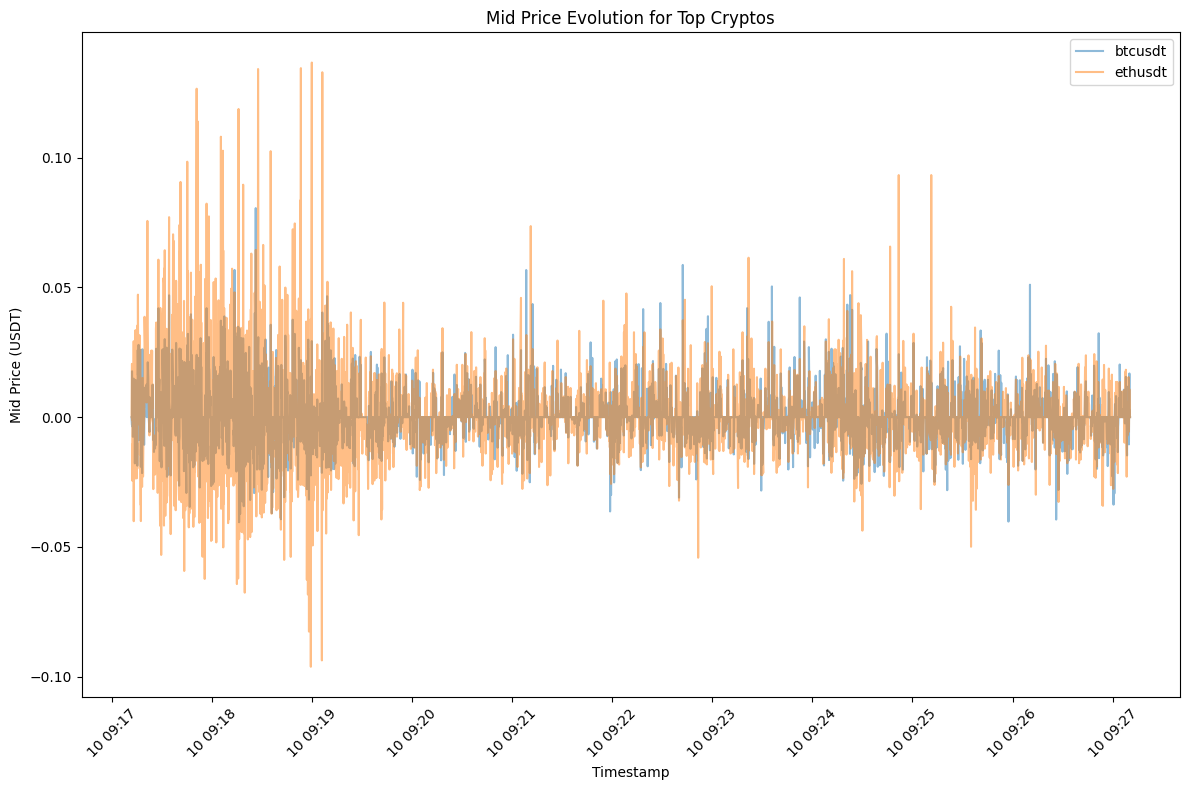

In [14]:
# Initialize the plot
plt.figure(figsize=(12, 8))

# Read the most recent CSV file for each symbol and plot the midprice
for symbol in symbols:
    df = read_most_recent_csv(symbol, depth_levels)
    if df is not None:
        df["timestamp"] = pd.to_datetime(df["timestamp"])  # Ensure the timestamp is in datetime format
        plt.plot(df["timestamp"], df["return"], label=symbol, alpha=0.5)

# Set plot labels and title
plt.xlabel("Timestamp")
plt.ylabel("Mid Price (USDT)")
plt.title("Mid Price Evolution for Top Cryptos")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

Reading data/btcusdt_20depth_20250310_092711.csv...
Reading data/ethusdt_20depth_20250310_092711.csv...


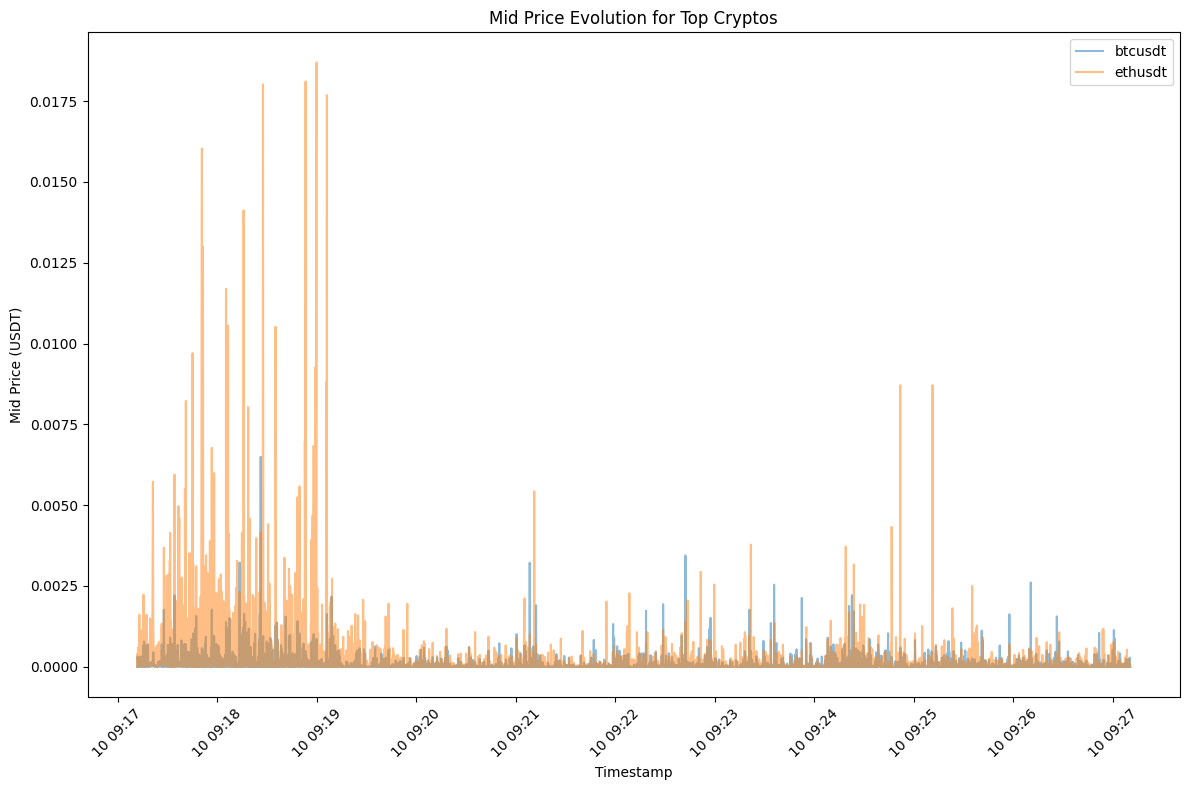

In [15]:
# Initialize the plot
plt.figure(figsize=(12, 8))

# Read the most recent CSV file for each symbol and plot the midprice
for symbol in symbols:
    df = read_most_recent_csv(symbol, depth_levels)
    if df is not None:
        df["timestamp"] = pd.to_datetime(df["timestamp"])  # Ensure the timestamp is in datetime format
        plt.plot(df["timestamp"], df["return"]**2, label=symbol, alpha=0.5)

# Set plot labels and title
plt.xlabel("Timestamp")
plt.ylabel("Mid Price (USDT)")
plt.title("Mid Price Evolution for Top Cryptos")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

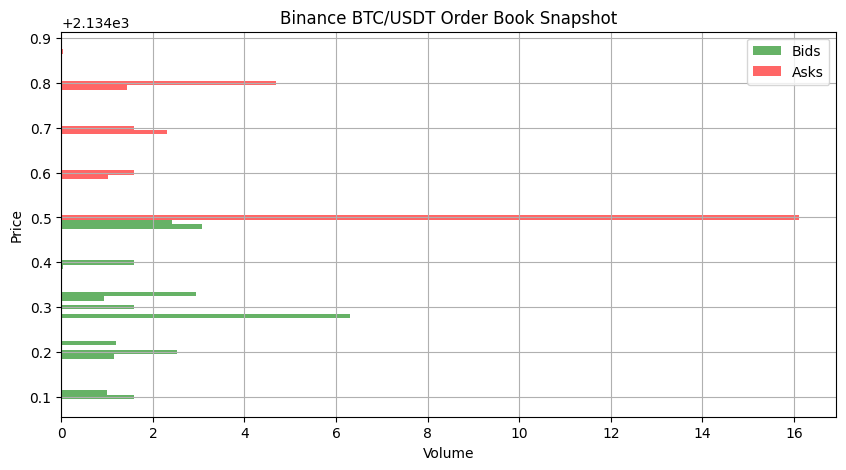

In [36]:
# Select the latest snapshot
latest_snapshot = df.iloc[-1]  # Get the last row

# Extract bid and ask prices & volumes
bid_prices = [latest_snapshot[f"bid_price_{i+1}"] for i in range(depth_levels)]
bid_volumes = [latest_snapshot[f"bid_vol_{i+1}"] for i in range(depth_levels)]
ask_prices = [latest_snapshot[f"ask_price_{i+1}"] for i in range(depth_levels)]
ask_volumes = [latest_snapshot[f"ask_vol_{i+1}"] for i in range(depth_levels)]

# Plot the order book
plt.figure(figsize=(10, 5))
plt.barh(bid_prices, bid_volumes, height=0.01, color="green", alpha=0.6, label="Bids")
plt.barh(ask_prices, ask_volumes, height=0.01, color="red", alpha=0.6, label="Asks")
plt.xlabel("Volume")
plt.ylabel("Price")
plt.title("Binance BTC/USDT Order Book Snapshot")
plt.legend()
plt.grid(True)
plt.show()

Reading data/btcusdt_20depth_20250310_092711.csv...
Reading data/ethusdt_20depth_20250310_092711.csv...


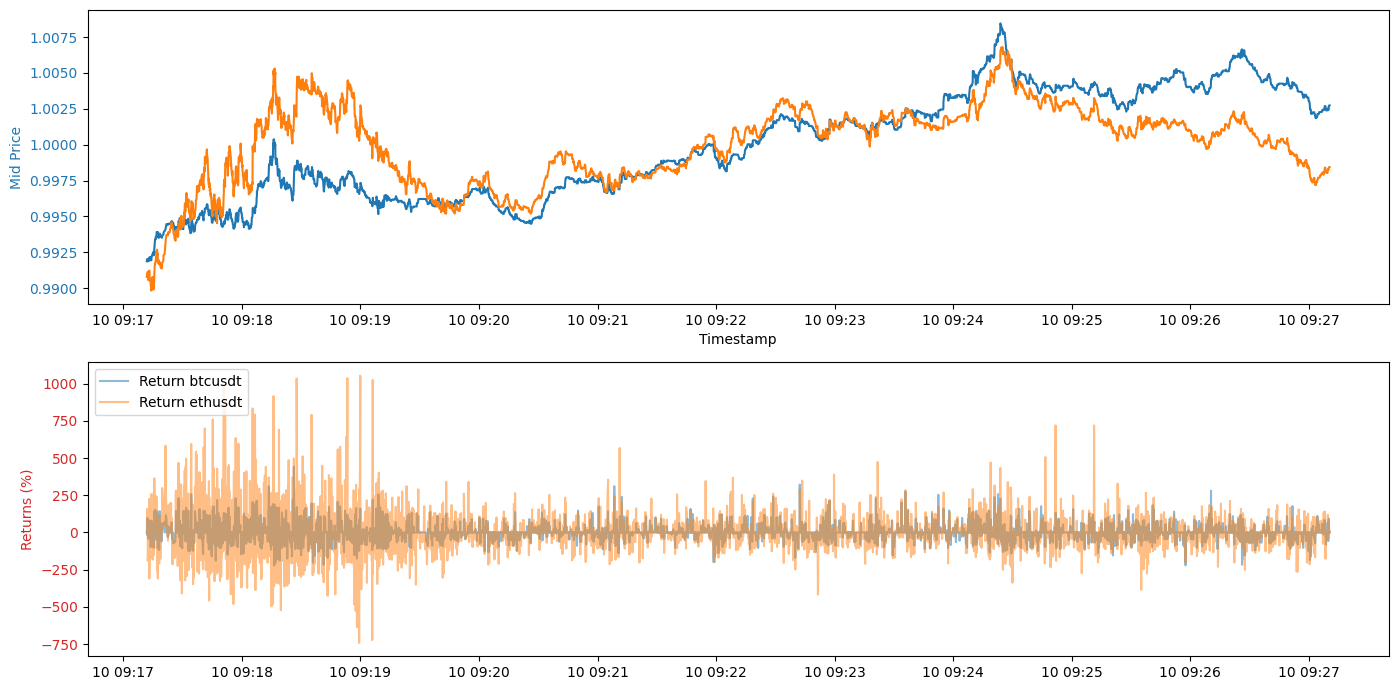

In [37]:
# Plot the midpoint price evolution
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(14, 7))

for symbol in symbols:
    df = read_most_recent_csv(symbol, depth_levels)
    # Ensure timestamp column is in datetime format
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    # Calculate the mid-price using the top bid and ask prices
    # Assuming the columns are named bid_price_1, ask_price_1, etc.
    # Select the first bid and ask prices from the columns
    df['bid_price_1'] = df['bid_price_1'].astype(float)
    df['ask_price_1'] = df['ask_price_1'].astype(float)
    
    ax1.set_xlabel('Timestamp')
    ax1.set_ylabel('Mid Price', color='tab:blue')
    ax1.plot(df['timestamp'], df['mid_price'] / df['mid_price'].mean(), label=f'Mid Price ({symbol})')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    
    # Create a second y-axis for returns
    ax2.set_ylabel('Returns (%)', color='tab:red')
    ax2.plot(df['timestamp'], df['return'] / df['return'].mean(), label=f'Return {symbol}', alpha=0.5)
    ax2.tick_params(axis='y', labelcolor='tab:red')

# Add title and legend
fig.tight_layout()
plt.legend(loc='upper left')
plt.show()